## 데이터셋 출처

* [서울시 공공자전거 이용정보(월별)> 데이터셋> 공공데이터 | 서울열린데이터광장](http://data.seoul.go.kr/dataList/OA-15248/F/1/datasetView.do)


## 필요한 라이브러리 로드

In [263]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 시각화를 위한 한글폰트 설정

In [264]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


# style 설정은 꼭 폰트설정 위에서 합니다.
# style 에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 한글이 깨집니다.
plt.style.use("seaborn")
# 폰트설정
plt.rc("font", family=get_font_family())

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

C:\Users\kh502\AppData\Local\Temp\ipykernel_2020\54892157.py:29: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [265]:
# # style 설정은 꼭 폰트설정 위에서 합니다.
# # style 에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 한글이 깨집니다.
# plt.style.use("seaborn")
# # 폰트설정
# plt.rc("font", family='Malgun Gothic')
# # 마이너스폰트 설정
# plt.rc("axes", unicode_minus=False)
# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'

## 데이터셋 불러오기

In [266]:
# ./data/monthly_2021/*.csv
# glob 로 목록 출력하기
import glob
paths = glob.glob('./data06/*.csv')
paths

['./data06\\서울특별시 공공자전거 이용정보(월별)_21.01.csv',
 './data06\\서울특별시 공공자전거 이용정보(월별)_21.02.csv',
 './data06\\서울특별시 공공자전거 이용정보(월별)_21.03.csv',
 './data06\\서울특별시 공공자전거 이용정보(월별)_21.04.csv',
 './data06\\서울특별시 공공자전거 이용정보(월별)_21.05.csv',
 './data06\\서울특별시 공공자전거 이용정보(월별)_21.06.csv',
 './data06\\서울특별시 공공자전거 이용정보(월별)_21.07.csv',
 './data06\\서울특별시 공공자전거 이용정보(월별)_21.08.csv',
 './data06\\서울특별시 공공자전거 이용정보(월별)_21.09.csv',
 './data06\\서울특별시 공공자전거 이용정보(월별)_21.10.csv',
 './data06\\서울특별시 공공자전거 이용정보(월별)_21.11.csv',
 './data06\\서울특별시 공공자전거 이용정보(월별)_21.12.csv']

In [267]:
# columns={"이동거리(M)": "이용거리(M)", "이용시간(본)":"이용시간(분)"} 컬럼명 일관되게 변경하기
# temp 에 데이터 프레임 담기
temp = []
for pth in paths:
    df_temp = pd.read_csv(pth, encoding='cp949')
    df_temp = df_temp.rename(columns={'이동거리(M)':'이용거리(M)', '이용시간(본)':'이용시간(분)'})
    temp.append(df_temp)


In [268]:
temp[0].columns

Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이용거리(M)', '이용시간(분)'],
      dtype='object')

## concat으로 전체 파일 하나로 병합하기

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

In [269]:
# concat 으로 하나의 데이터프레임으로 변환하기
# raw
raw = pd.concat(temp)
raw.shape

(1323515, 11)

## info 보기

In [270]:
# info
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1323515 entries, 0 to 102925
Data columns (total 11 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   대여일자     1323515 non-null  object 
 1   대여소번호    1323515 non-null  int64  
 2   대여소명     1323515 non-null  object 
 3   대여구분코드   1323515 non-null  object 
 4   성별       1151062 non-null  object 
 5   연령대코드    1323515 non-null  object 
 6   이용건수     1323515 non-null  int64  
 7   운동량      1323515 non-null  object 
 8   탄소량      1323515 non-null  object 
 9   이용거리(M)  1323515 non-null  float64
 10  이용시간(분)  1323515 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 121.2+ MB


In [271]:
# dtypes
raw.dtypes

대여일자        object
대여소번호        int64
대여소명        object
대여구분코드      object
성별          object
연령대코드       object
이용건수         int64
운동량         object
탄소량         object
이용거리(M)    float64
이용시간(분)      int64
dtype: object

In [272]:
raw.head(2)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
0,2021-01,3,중랑센터,일일(회원),M,AGE_003,2,47.68,0.40,1720.00,25
1,2021-01,3,중랑센터,정기,M,AGE_003,11,578.98,2.87,12390.48,166


In [273]:
# object 타입은 뭐가 들어있는지 확인할 필요가 있다.
raw['성별'].unique()

array(['M', '\\N', 'F', nan, 'f', 'm'], dtype=object)

In [274]:
# unique 한게 얼마나 들어가 있는지
raw['성별'].value_counts()

성별
\N    407787
M     389556
F     353355
m        255
f        109
Name: count, dtype: int64

In [275]:
# 비율로 보기
raw['성별'].value_counts() / raw.shape[0] * 100

성별
\N    30.810909
M     29.433440
F     26.698224
m      0.019267
f      0.008236
Name: count, dtype: float64

-> 데이터 정제가 필요하다

In [276]:
print(raw['대여구분코드'].unique())
raw['대여구분코드'].value_counts() / raw.shape[0] * 100

['일일(회원)' '정기' '단체' '일일(비회원)' 'BIL_021' '10분이용권']


대여구분코드
정기         51.212189
일일(회원)     38.458877
단체          6.906684
일일(비회원)     2.889805
10분이용권      0.497010
BIL_021     0.035436
Name: count, dtype: float64

In [277]:
print(raw['연령대코드'].unique())
raw['연령대코드'].value_counts() / raw.shape[0] * 100

['AGE_003' 'AGE_004' 'AGE_008' 'AGE_005' 'AGE_001' 'AGE_002' 'AGE_006'
 'AGE_007']


연령대코드
AGE_002    18.794196
AGE_003    16.675973
AGE_004    15.961663
AGE_008    13.659233
AGE_001    12.933816
AGE_005    12.485465
AGE_006     7.121113
AGE_007     2.368541
Name: count, dtype: float64

## 데이터 타입 변경

In [278]:
raw['운동량'].value_counts() / raw.shape[0] * 100

운동량
0.00        1.864051
\N          0.143482
37.07       0.009747
43.24       0.009218
36.04       0.008991
              ...   
10387.21    0.000076
28970.08    0.000076
10019.44    0.000076
4777.98     0.000076
2653.37     0.000076
Name: count, Length: 428329, dtype: float64

In [279]:
# 운동량, 탄소량 to_numeric 으로 변경하기
# to_numberic :
#  1. 'int', 'float' 중 가장 적합한 숫자 타입으로 결정
#  2. 오류처리 : 'errors' 매개변수를 통해 변환 중 발생될 수 있는 오류를 유연하게 처리해준다.
#                 errors='coerce' 옵션을 사용하면 변경할 수 없는 값은 NaN(Not a Number)로 설정
# raw["운동량"]
# raw["탄소량"]
raw["운동량"] = pd.to_numeric(raw['운동량'], errors='coerce')
raw["탄소량"] = pd.to_numeric(raw['탄소량'], errors='coerce')
raw.head(5)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
0,2021-01,3,중랑센터,일일(회원),M,AGE_003,2,47.68,0.40,1720.00,25
1,2021-01,3,중랑센터,정기,M,AGE_003,11,578.98,2.87,12390.48,166
2,2021-01,3,중랑센터,정기,M,AGE_004,1,81.65,0.53,2291.05,13
3,2021-01,5,상암센터 정비실,일일(회원),\N,AGE_004,1,511.95,3.53,15209.58,47
4,2021-01,5,상암센터 정비실,일일(회원),M,AGE_004,6,371.10,3.39,14642.60,134


In [280]:
# object타입의 날짜를 datetime으로 변환
# raw['대여일자'].astype('datetime64')
# 날짜타입 변환시 astype보다는 pd.to_datetime()으로
# raw['대여일자'] = pd.to_datetime(raw['대여일자'])
# raw.dtypes

## 결측치

In [281]:
# 결측치 합계
raw.isnull().sum()

대여일자            0
대여소번호           0
대여소명            0
대여구분코드          0
성별         172453
연령대코드           0
이용건수            0
운동량          1899
탄소량          1899
이용거리(M)         0
이용시간(분)         0
dtype: int64

<Axes: >

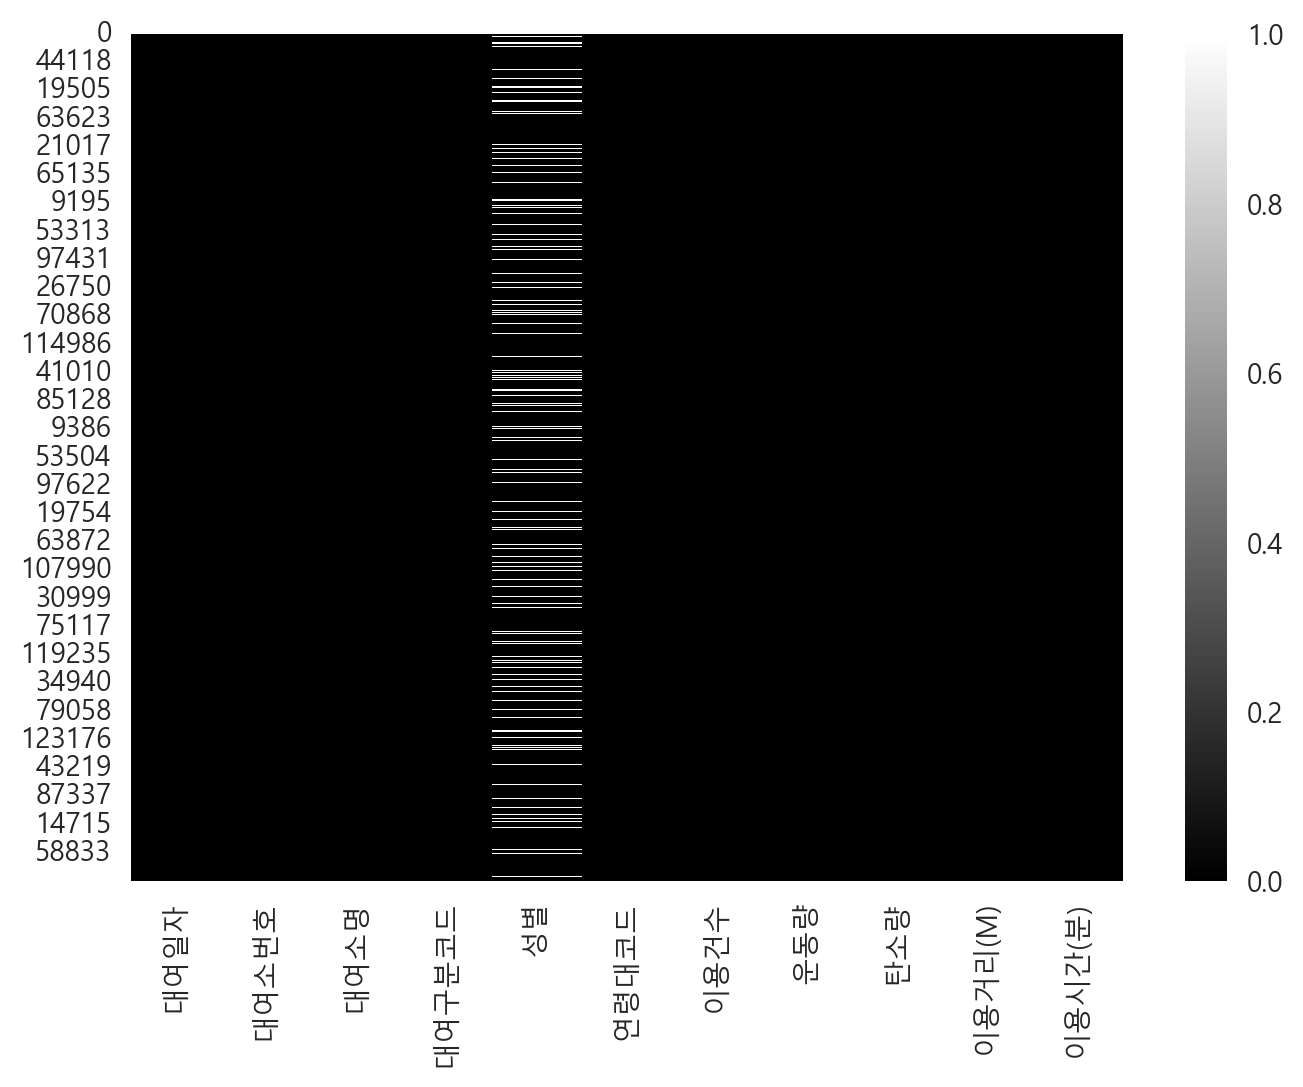

In [282]:
# 결측치 시각화
sns.heatmap(raw.isnull(), cmap='gray')

## 대여소 정보 불러오기

In [283]:
# 대여소 정보 불러오기
# data/bike_station.csv
# "대여소번호", "자치구", "위도", "경도", "운영방식" 컬럼만 가져오기
# df_st
df_st = pd.read_csv('bike_station.csv')
df_st = df_st[['대여소번호', '자치구', '위도', '경도', '운영방식']]
df_st.head(5)

,대여소번호,자치구,위도,경도,운영방식
0,301.0,종로구,37.575794,126.971451,QR
1,302.0,종로구,37.575947,126.974060,QR
2,303.0,종로구,37.571770,126.974663,QR
3,305.0,종로구,37.572559,126.978333,QR
4,307.0,종로구,37.570000,126.971100,QR


In [284]:
# 대여소번호 는 int 형식으로 변경하기
df_st["대여소번호"] = df_st["대여소번호"].astype(int)
df_st.dtypes

대여소번호      int32
자치구       object
위도       float64
경도       float64
운영방식      object
dtype: object

## 대여정보와 대여소정보 merge로 합치기

<img src="https://pandas.pydata.org/docs/_images/08_merge_left.svg">

<img src="https://i.imgur.com/nD1Hwdl.png" width=500>



In [285]:
print(raw.shape)
print(df_st.shape)

(1323515, 11)
(2762, 5)


In [286]:
df_st.columns

Index(['대여소번호', '자치구', '위도', '경도', '운영방식'], dtype='object')

In [287]:
# merge 로 대여정보와 대여소 정보 병합하기
# df
df = raw.merge(df_st, on='대여소번호', how='left')
print(df.shape)
print(df.columns)
# 이용 정보를 기준으로..

(1323515, 15)
Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이용거리(M)', '이용시간(분)', '자치구', '위도', '경도', '운영방식'],
      dtype='object')


In [288]:
# 결측치 비율
df.isnull().mean() * 100

대여일자        0.000000
대여소번호       0.000000
대여소명        0.000000
대여구분코드      0.000000
성별         13.029924
연령대코드       0.000000
이용건수        0.000000
운동량         0.143482
탄소량         0.143482
이용거리(M)     0.000000
이용시간(분)     0.000000
자치구         3.797690
위도          3.797690
경도          3.797690
운영방식        3.797690
dtype: float64

<Axes: xlabel='자치구'>

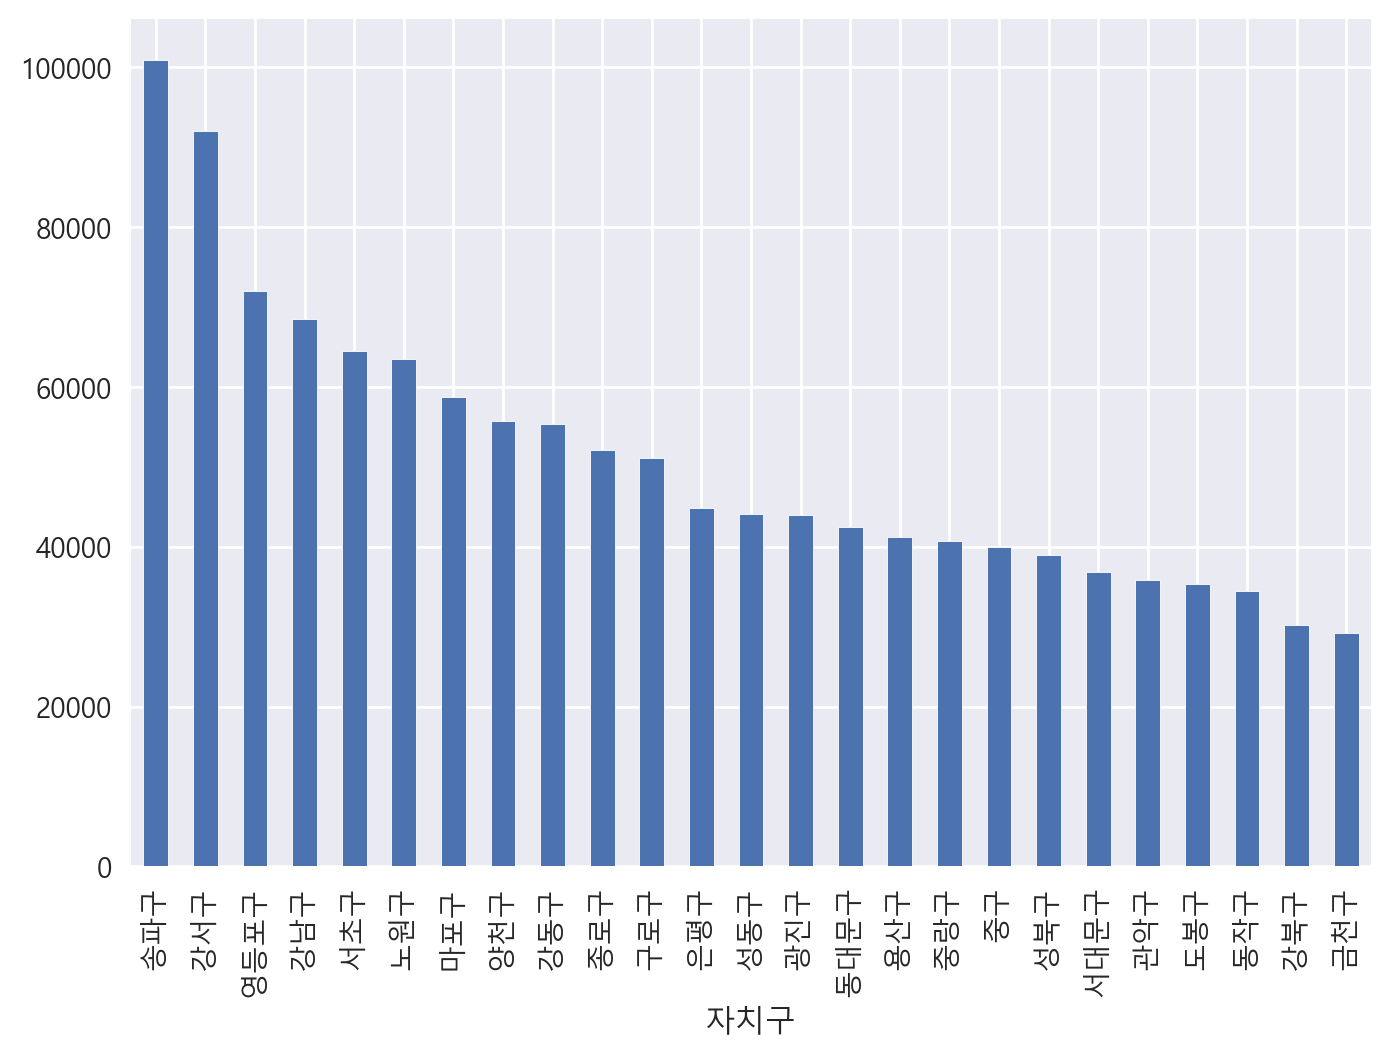

In [289]:
# 자치구 별 빈도수 구하기
df['자치구'].value_counts().plot.bar()

<Axes: ylabel='자치구'>

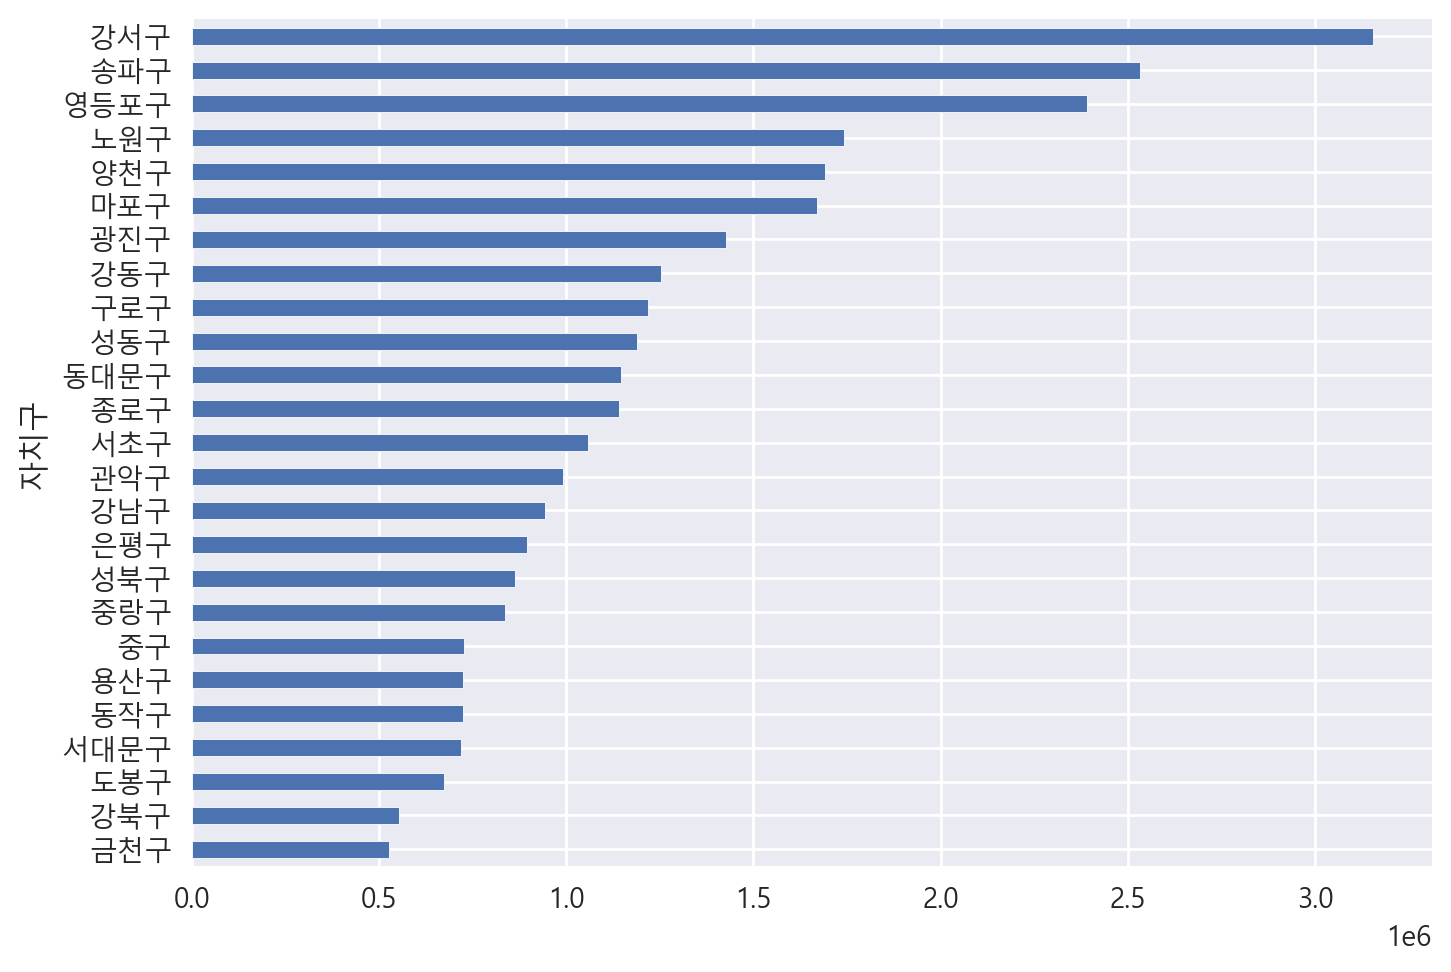

In [290]:
# 자치구 별 이용건수
df.groupby('자치구')['이용건수'].sum().sort_values(ascending=True).plot.barh()

## 히스토그램

<Figure size 1200x1000 with 0 Axes>

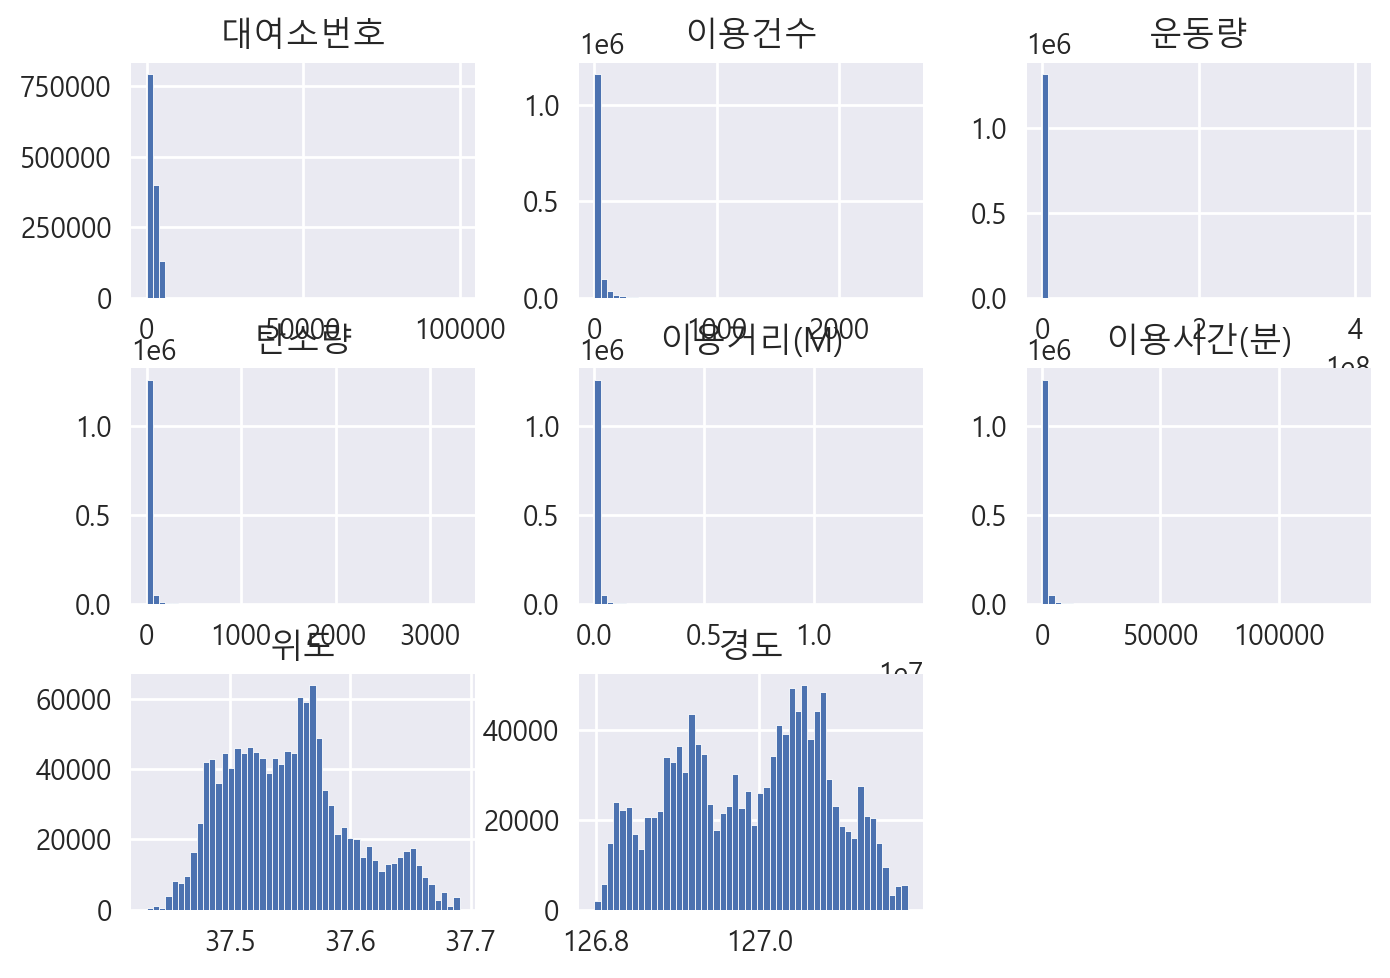

In [291]:
plt.figure(figsize=(12, 10))
df.hist(bins=50)
plt.show()

In [292]:
df.describe().round(1)

,대여소번호,이용건수,운동량,탄소량,이용거리(M),이용시간(분),위도,경도
count,1323515.0,1323515.0,1321616.0,1321616.0,1323515.0,1323515.0,1273252.0,1273252.0
mean,1875.5,24.2,3094.8,15.7,67726.0,623.1,37.5,127.0
std,1401.7,49.0,475591.0,34.9,150446.5,1325.5,0.1,0.1
min,3.0,1.0,0.0,0.0,0.0,0.0,37.4,126.8
25%,794.0,2.0,165.2,1.5,6399.5,68.0,37.5,126.9
50%,1617.0,7.0,567.4,5.1,21787.0,213.0,37.5,127.0
75%,2632.0,25.0,1822.7,16.1,69179.4,654.0,37.6,127.1
max,99999.0,2559.0,400008918.7,3314.2,14285335.2,132301.0,37.7,127.2


In [293]:
df[df['탄소량']==df['탄소량'].max()]

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분),자치구,위도,경도,운영방식
260387,2021-04,207,207. 여의나루역 1번출구 앞,일일(회원),\N,AGE_002,2301,350736.19,3314.16,14285335.19,130483,영등포구,37.527157,126.9319,QR


In [294]:
df.nlargest(10,'탄소량')

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분),자치구,위도,경도,운영방식
260387,2021-04,207,207. 여의나루역 1번출구 앞,일일(회원),\N,AGE_002,2301,350736.19,3314.16,14285335.19,130483,영등포구,37.527157,126.931900,QR
856552,2021-09,207,207. 여의나루역 1번출구 앞,일일(회원),\N,AGE_002,2379,316001.59,3002.36,12940352.12,129664,영등포구,37.527157,126.931900,QR
870019,2021-09,502,502. 뚝섬유원지역 1번출구 앞,일일(회원),\N,AGE_002,2559,315695.65,2960.40,12760540.87,122013,광진구,37.531860,127.067192,QR
273315,2021-04,502,502. 뚝섬유원지역 1번출구 앞,일일(회원),\N,AGE_002,2306,309633.17,2923.45,12601358.22,114994,광진구,37.531860,127.067192,QR
375315,2021-05,207,207. 여의나루역 1번출구 앞,일일(회원),\N,AGE_002,1815,296620.50,2784.38,12001826.02,103582,영등포구,37.527157,126.931900,QR
856566,2021-09,207,207. 여의나루역 1번출구 앞,일일(회원),F,AGE_002,2236,268468.38,2702.66,11649881.29,132301,영등포구,37.527157,126.931900,QR
159875,2021-03,207,207. 여의나루역 1번출구 앞,일일(회원),\N,AGE_002,1673,265915.75,2494.81,10753311.33,97614,영등포구,37.527157,126.931900,QR
159888,2021-03,207,207. 여의나루역 1번출구 앞,일일(회원),F,AGE_002,1778,240837.06,2464.23,10621611.81,111616,영등포구,37.527157,126.931900,QR
388418,2021-05,502,502. 뚝섬유원지역 1번출구 앞,일일(회원),\N,AGE_002,1875,259133.19,2448.65,10554440.96,91827,광진구,37.531860,127.067192,QR
493300,2021-06,207,207. 여의나루역 1번출구 앞,일일(회원),\N,AGE_002,1562,251219.34,2376.18,10242192.30,87111,영등포구,37.527157,126.931900,QR


## 이용건수

In [295]:
# 이용건수가 1000 이상인 데이터 찾기
print(df[df['이용건수'] > 1000].shape)
df[df['이용건수'] > 1000]

(125, 15)


,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분),자치구,위도,경도,운영방식
83122,2021-02,502,502. 뚝섬유원지역 1번출구 앞,일일(회원),\N,AGE_002,1043,153826.59,1428.97,6159492.83,53430,광진구,37.531860,127.067192,QR
159875,2021-03,207,207. 여의나루역 1번출구 앞,일일(회원),\N,AGE_002,1673,265915.75,2494.81,10753311.33,97614,영등포구,37.527157,126.931900,QR
159888,2021-03,207,207. 여의나루역 1번출구 앞,일일(회원),F,AGE_002,1778,240837.06,2464.23,10621611.81,111616,영등포구,37.527157,126.931900,QR
159896,2021-03,207,207. 여의나루역 1번출구 앞,일일(회원),M,AGE_002,1148,200316.88,1657.90,7145769.34,66564,영등포구,37.527157,126.931900,QR
171548,2021-03,502,502. 뚝섬유원지역 1번출구 앞,일일(회원),\N,AGE_002,1597,227533.69,2136.86,9210430.62,81196,광진구,37.531860,127.067192,QR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150124,2021-11,1308,1308. 안암로터리 버스정류장 앞,정기,\N,AGE_002,1004,44480.25,385.34,1660257.03,18022,성북구,37.582592,127.028976,LCD
1150145,2021-11,1308,1308. 안암로터리 버스정류장 앞,정기,M,AGE_002,1102,53498.99,439.24,1893270.87,21094,성북구,37.582592,127.028976,LCD
1187674,2021-11,2701,2701. 마곡나루역 5번출구 뒤편,정기,\N,AGE_002,1023,21207.85,188.41,812389.26,8973,강서구,37.565201,126.827316,LCD
1188300,2021-11,2715,2715.마곡나루역 2번 출구,정기,\N,AGE_002,1433,39199.42,353.21,1523002.02,15959,강서구,37.566925,126.827438,QR


In [296]:
df.nlargest(10, '이용건수')

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분),자치구,위도,경도,운영방식
870019,2021-09,502,502. 뚝섬유원지역 1번출구 앞,일일(회원),\N,AGE_002,2559,315695.65,2960.40,12760540.87,122013,광진구,37.531860,127.067192,QR
856552,2021-09,207,207. 여의나루역 1번출구 앞,일일(회원),\N,AGE_002,2379,316001.59,3002.36,12940352.12,129664,영등포구,37.527157,126.931900,QR
273315,2021-04,502,502. 뚝섬유원지역 1번출구 앞,일일(회원),\N,AGE_002,2306,309633.17,2923.45,12601358.22,114994,광진구,37.531860,127.067192,QR
260387,2021-04,207,207. 여의나루역 1번출구 앞,일일(회원),\N,AGE_002,2301,350736.19,3314.16,14285335.19,130483,영등포구,37.527157,126.931900,QR
856566,2021-09,207,207. 여의나루역 1번출구 앞,일일(회원),F,AGE_002,2236,268468.38,2702.66,11649881.29,132301,영등포구,37.527157,126.931900,QR
870032,2021-09,502,502. 뚝섬유원지역 1번출구 앞,일일(회원),F,AGE_002,1949,222107.14,2227.09,9599450.71,99577,광진구,37.531860,127.067192,QR
388418,2021-05,502,502. 뚝섬유원지역 1번출구 앞,일일(회원),\N,AGE_002,1875,259133.19,2448.65,10554440.96,91827,광진구,37.531860,127.067192,QR
375315,2021-05,207,207. 여의나루역 1번출구 앞,일일(회원),\N,AGE_002,1815,296620.50,2784.38,12001826.02,103582,영등포구,37.527157,126.931900,QR
159888,2021-03,207,207. 여의나루역 1번출구 앞,일일(회원),F,AGE_002,1778,240837.06,2464.23,10621611.81,111616,영등포구,37.527157,126.931900,QR
159875,2021-03,207,207. 여의나루역 1번출구 앞,일일(회원),\N,AGE_002,1673,265915.75,2494.81,10753311.33,97614,영등포구,37.527157,126.931900,QR


## 대여구분
RCC_001(정기권), RCC_002(일일권), RCC_003(일일권:비회원), RCC_004(단체권)

In [297]:
# 대여구분코드 빈도수 구하기
df['대여구분코드'].value_counts().sort_values(ascending=False)

대여구분코드
정기         677801
일일(회원)     509009
단체          91411
일일(비회원)     38247
10분이용권       6578
BIL_021       469
Name: count, dtype: int64

In [298]:
# 대여구분코드 BIL_021을 '10분이용권'으로 수정
df.loc[df['대여구분코드']=='BIL_021', '대여구분코드'] = '10분이용권'

In [299]:
# 대여구분코드 빈도수 구하기
df['대여구분코드'].value_counts().sort_values(ascending=False)

대여구분코드
정기         677801
일일(회원)     509009
단체          91411
일일(비회원)     38247
10분이용권       7047
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='대여구분코드'>

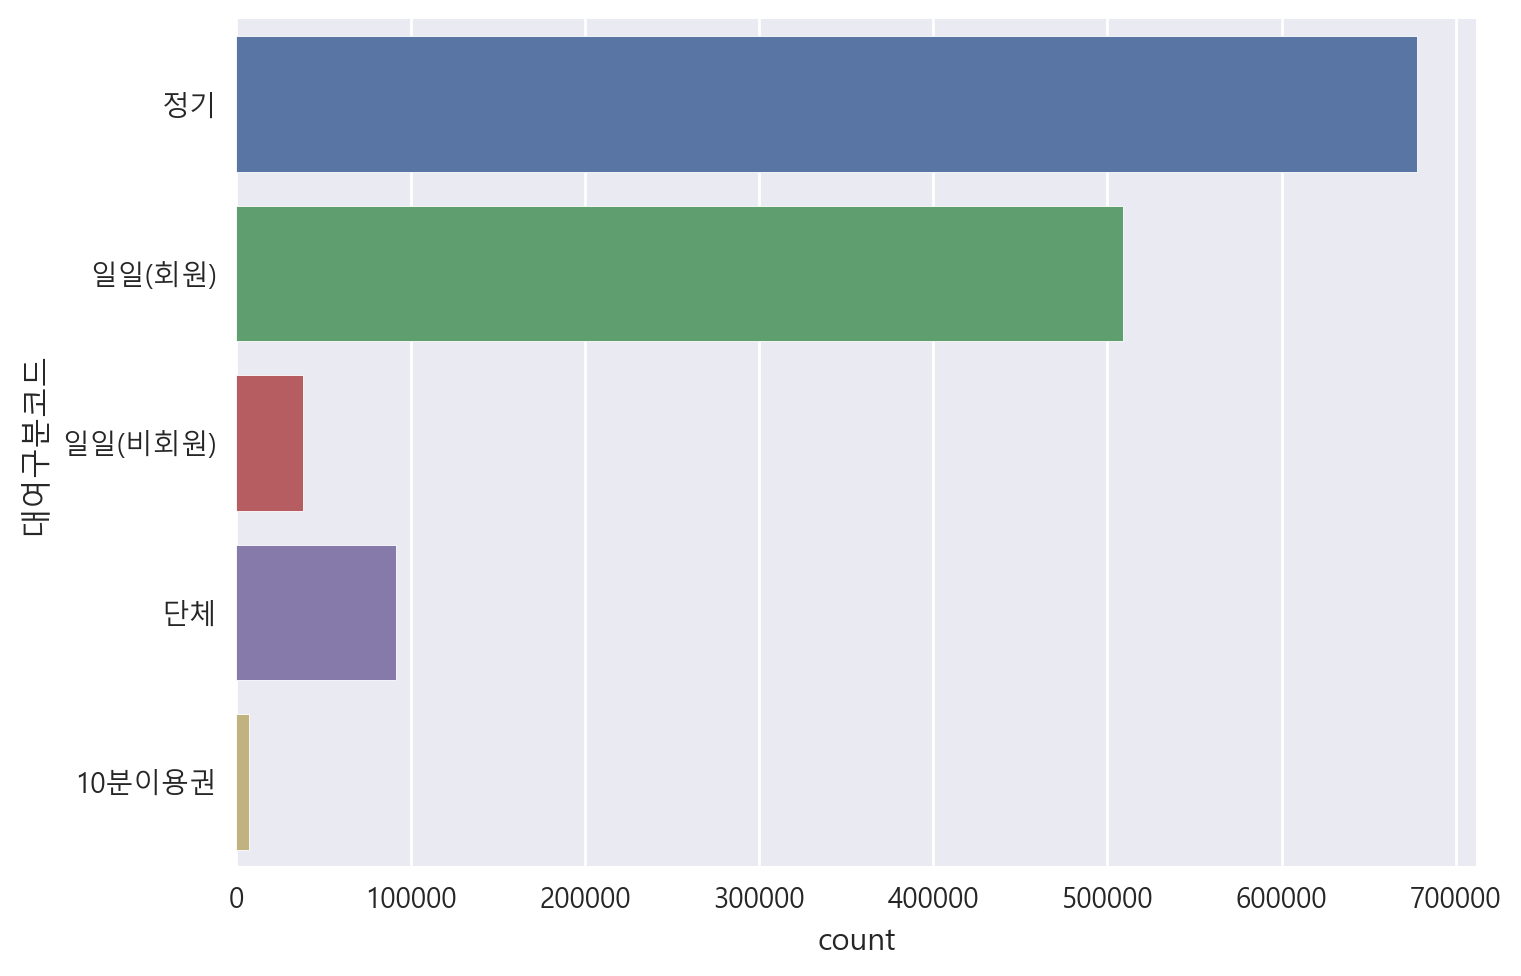

In [300]:
# countplot으로 "대여구분코드" 빈도수 시각화
sns.countplot(data=df.sort_values(by='대여구분코드', ascending=False), y='대여구분코드')

<Axes: xlabel='이용건수', ylabel='대여구분코드'>

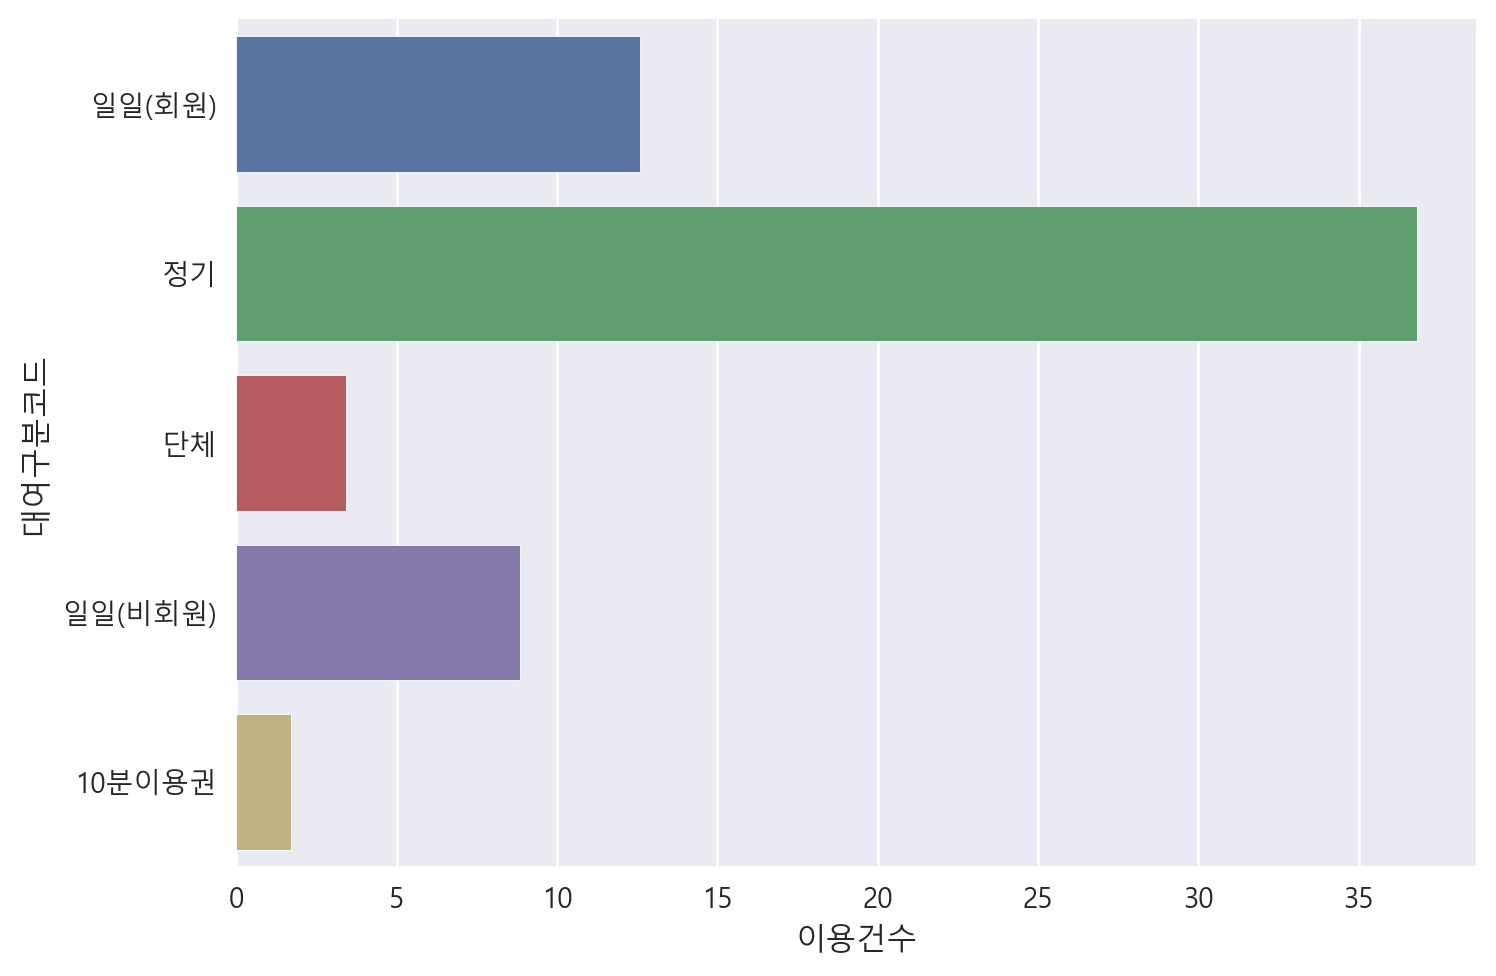

In [301]:
# x="이용건수", y="대여구분코드" 합계 구하기
# seaborn 라이브러리는 그래프 그릴 때 데이터프레임 정보를 통해서 기본 집계한 결과를 그려준다
# barplot 기본 집계는 mean, 변경식 estimator 파라미터를 이용해서 집계함수를 대입해준다.
sns.barplot(data=df, x='이용건수', y='대여구분코드', errorbar=None)

## 성별
\N, 공백은 성별을 선택하지 않은 경우이며,

성별이 F,M 외에 \N(null값), 공백이 포함되어있는 이유는

19년10월까지는 회원가입 시 성별 기입이 선택사항이었기 때문

In [302]:
# 성별 빈도수 구하기
df['성별'].value_counts()

성별
\N    407787
M     389556
F     353355
m        255
f        109
Name: count, dtype: int64

In [303]:
# 성별 대문자로 변경
# df["성별"]
# case 1)
# df.loc[df['성별'] == 'm', '성별'] = 'M'
# df.loc[df['성별'] == 'f', '성별'] = 'F'
# case 2) 시리즈를 대문자로 변환
df['성별'] = df['성별'].str.upper()

In [304]:
# value_counts 로 전처리 값 확인
df['성별'].value_counts()

성별
\N    407787
M     389811
F     353464
Name: count, dtype: int64

## 연령대

```
10대 : AGE_001
20대 : AGE_002
30대 : AGE_003
40대 : AGE_004
50대 : AGE_005
60대 : AGE_006
70대 : AGE_007
기타 : AGE_008 ( 비회원, 외국인, 그 이상 등 )
```

In [305]:
df['연령대코드'].value_counts()

연령대코드
AGE_002    248744
AGE_003    220709
AGE_004    211255
AGE_008    180782
AGE_001    171181
AGE_005    165247
AGE_006     94249
AGE_007     31348
Name: count, dtype: int64

In [306]:
# 문자열이 여러줄로 되어있을 때 """""" or ''''''로 감싼다
age_code = """
10대 : AGE_001
20대 : AGE_002
30대 : AGE_003
40대 : AGE_004
50대 : AGE_005
60대 : AGE_006
70대 : AGE_007
기타 : AGE_008
"""
age_code

'\n10대 : AGE_001\n20대 : AGE_002\n30대 : AGE_003\n40대 : AGE_004\n50대 : AGE_005\n60대 : AGE_006\n70대 : AGE_007\n기타 : AGE_008\n'

In [307]:
# age_dict 값 만들기
age_dict = {}
age_code.split('\n')

['',
 '10대 : AGE_001',
 '20대 : AGE_002',
 '30대 : AGE_003',
 '40대 : AGE_004',
 '50대 : AGE_005',
 '60대 : AGE_006',
 '70대 : AGE_007',
 '기타 : AGE_008',
 '']

In [308]:
# age_dict 값 만들기
age_dict = {}
for ele in age_code.split('\n')[1:]:
    print(ele)

10대 : AGE_001
20대 : AGE_002
30대 : AGE_003
40대 : AGE_004
50대 : AGE_005
60대 : AGE_006
70대 : AGE_007
기타 : AGE_008



In [309]:
# age_dict 값 만들기 최종 case 1)
age_dict = {}
for ele in age_code.split('\n')[1:-1]:
    key = ele.split(":")[1].strip()
    value = ele.split(":")[0].strip()
    age_dict[key] = value
print(age_dict)

{'AGE_001': '10대', 'AGE_002': '20대', 'AGE_003': '30대', 'AGE_004': '40대', 'AGE_005': '50대', 'AGE_006': '60대', 'AGE_007': '70대', 'AGE_008': '기타'}


In [310]:
# # age_dict 값 만들기 최종 case 2)
# age_dict = {}
# for ele in age_code.split('\n')[1:]:
#     if ":" in ele:
#         key = ele.split(":")[1].strip()
#         value = ele.split(":")[0].strip()
#         age_dict[key] = value
# print(age_dict)

### map 활용하기

In [311]:
# "연령대" 파생변수 만들기
# df["연령대"]
df['연령대코드'].map(lambda key : age_dict[key])

0          30대
1          30대
2          40대
3          40대
4          40대
          ... 
1323510    50대
1323511    60대
1323512     기타
1323513    60대
1323514     기타
Name: 연령대코드, Length: 1323515, dtype: object

In [312]:
# df["연령대"] = df['연령대코드'].map(age_dict) # JS 화살표 함수 때 생략 처럼 생략가능
df["연령대"] = df['연령대코드'].map(lambda key : age_dict[key])
df.head(3)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분),자치구,위도,경도,운영방식,연령대
0,2021-01,3,중랑센터,일일(회원),M,AGE_003,2,47.68,0.40,1720.00,25,NaN,NaN,NaN,NaN,30대
1,2021-01,3,중랑센터,정기,M,AGE_003,11,578.98,2.87,12390.48,166,NaN,NaN,NaN,NaN,30대
2,2021-01,3,중랑센터,정기,M,AGE_004,1,81.65,0.53,2291.05,13,NaN,NaN,NaN,NaN,40대


In [313]:
# 연령대 빈도수 구하기
# age_count
age_count = df['연령대'].value_counts().sort_index()
age_count

연령대
10대    171181
20대    248744
30대    220709
40대    211255
50대    165247
60대     94249
70대     31348
기타     180782
Name: count, dtype: int64

<Axes: xlabel='연령대'>

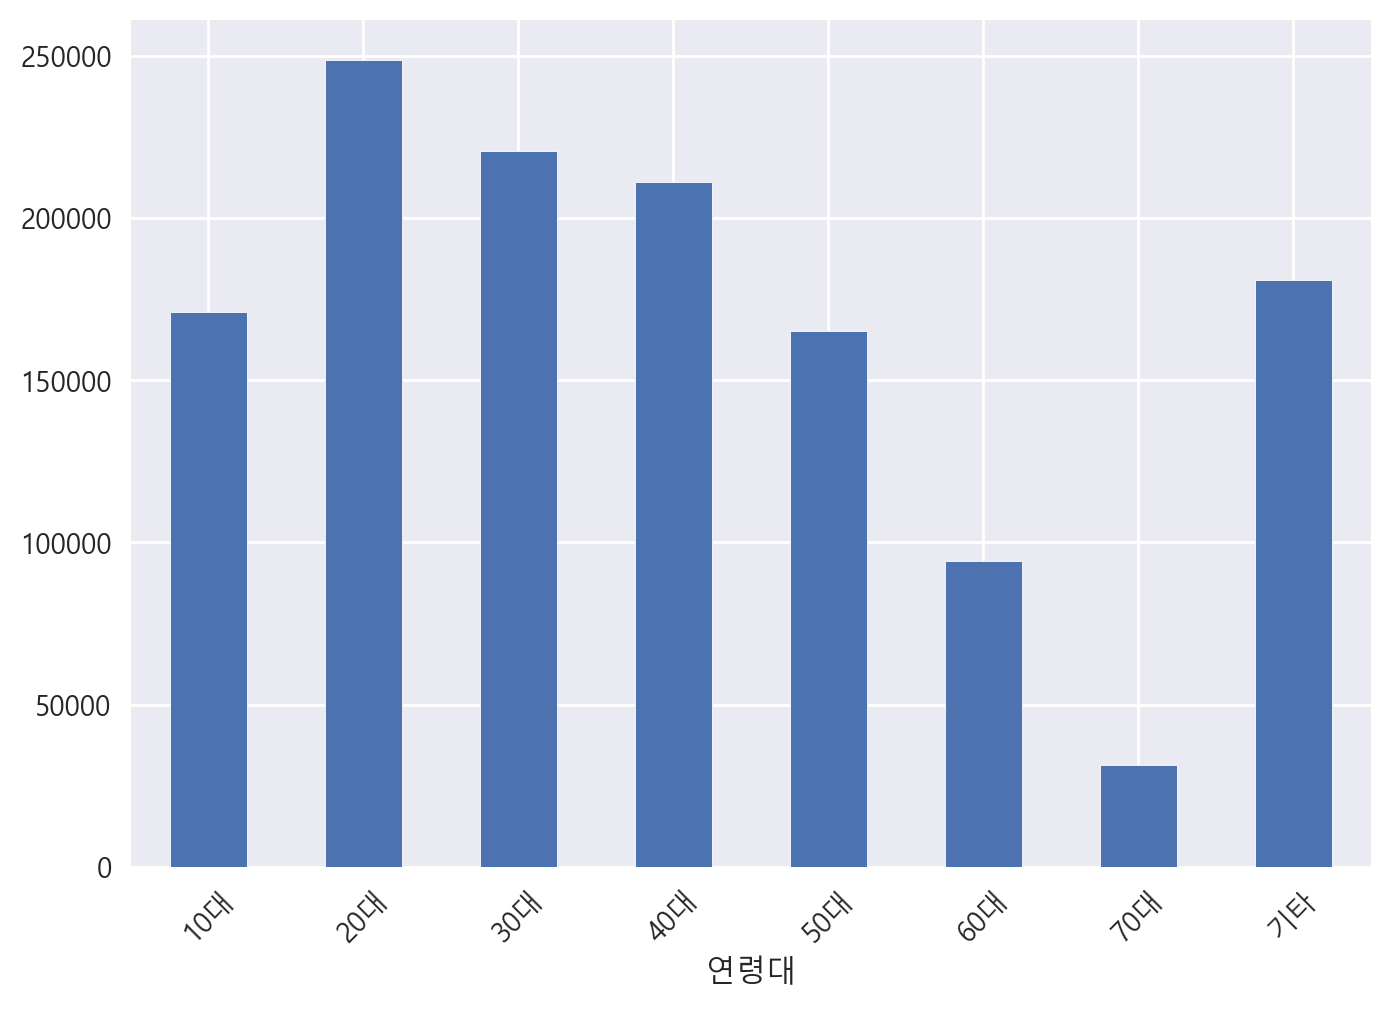

In [314]:
# 연령대 빈도수 시각화
age_count.plot(kind='bar', rot=45)

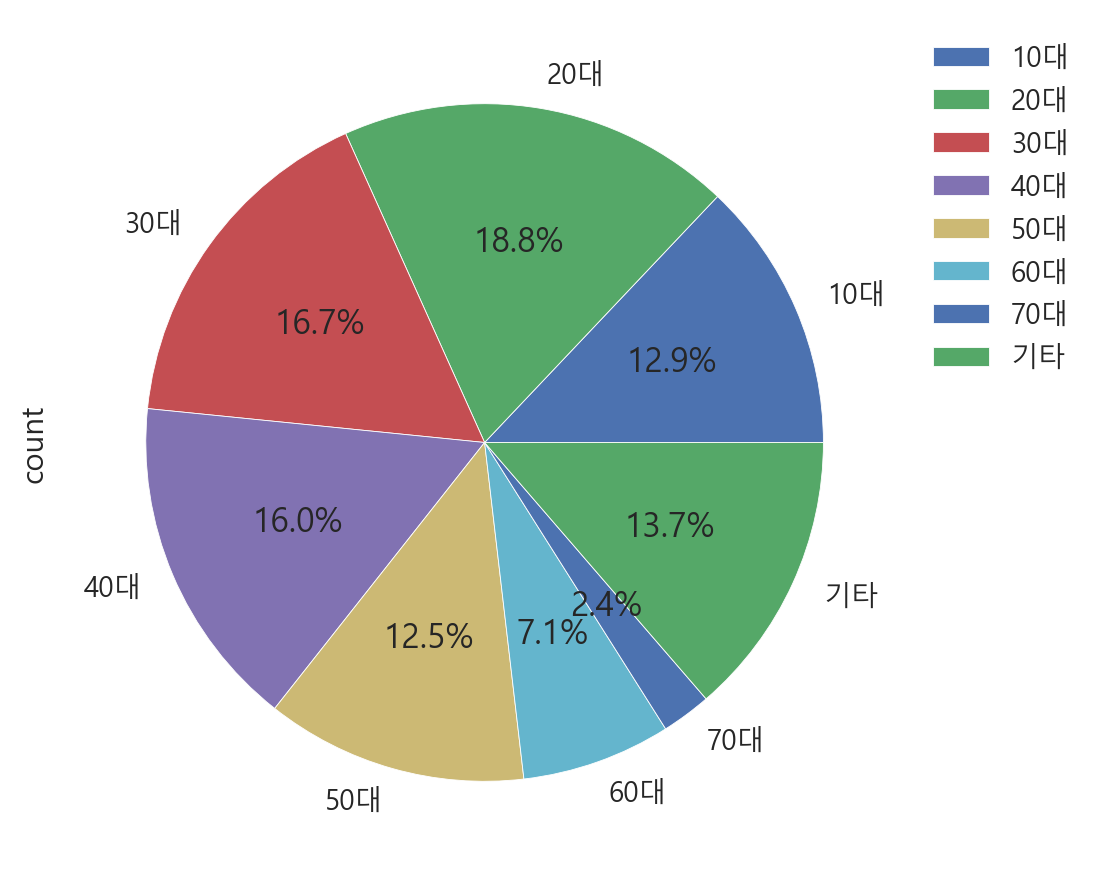

In [315]:
age_count.plot.pie(autopct='%1.1f%%')
plt.legend(age_count.index, bbox_to_anchor=(1,1))
plt.show()

## 연령대 vs 성별

In [449]:
# index="연령대", columns="성별", values="이용건수" 합계
# age_gender
age_gender = pd.pivot_table(data=df, index="연령대",
                            columns="성별", values="이용건수", aggfunc='sum')
age_gender

성별,F,M,\N
연령대,,,
10대,319611,671170,485850
20대,2871410,3221641,5455170
30대,1681424,2587231,2511553
40대,917777,1731265,1474314
50대,561681,1037358,896054
60대,111240,354522,245864
70대,27128,48703,28773
기타,1139841,1661739,658026


In [450]:
# 컬럼명 변경
age_gender.columns = ['남자', '여자', '알수없음']

In [451]:
# 행 방향 합계 컬럼 파생
age_gender.loc['합계'] = age_gender.sum(axis=0)

In [452]:
# 컬럼 방향 합계 컬럼 파생
age_gender['합계'] = age_gender.sum(axis=1)

In [453]:
age_gender.round(1)

,남자,여자,알수없음,합계
연령대,,,,
10대,319611,671170,485850,1476631
20대,2871410,3221641,5455170,11548221
30대,1681424,2587231,2511553,6780208
40대,917777,1731265,1474314,4123356
50대,561681,1037358,896054,2495093
60대,111240,354522,245864,711626
70대,27128,48703,28773,104604
기타,1139841,1661739,658026,3459606
합계,7630112,11313629,11755604,30699345


<Axes: xlabel='연령대'>

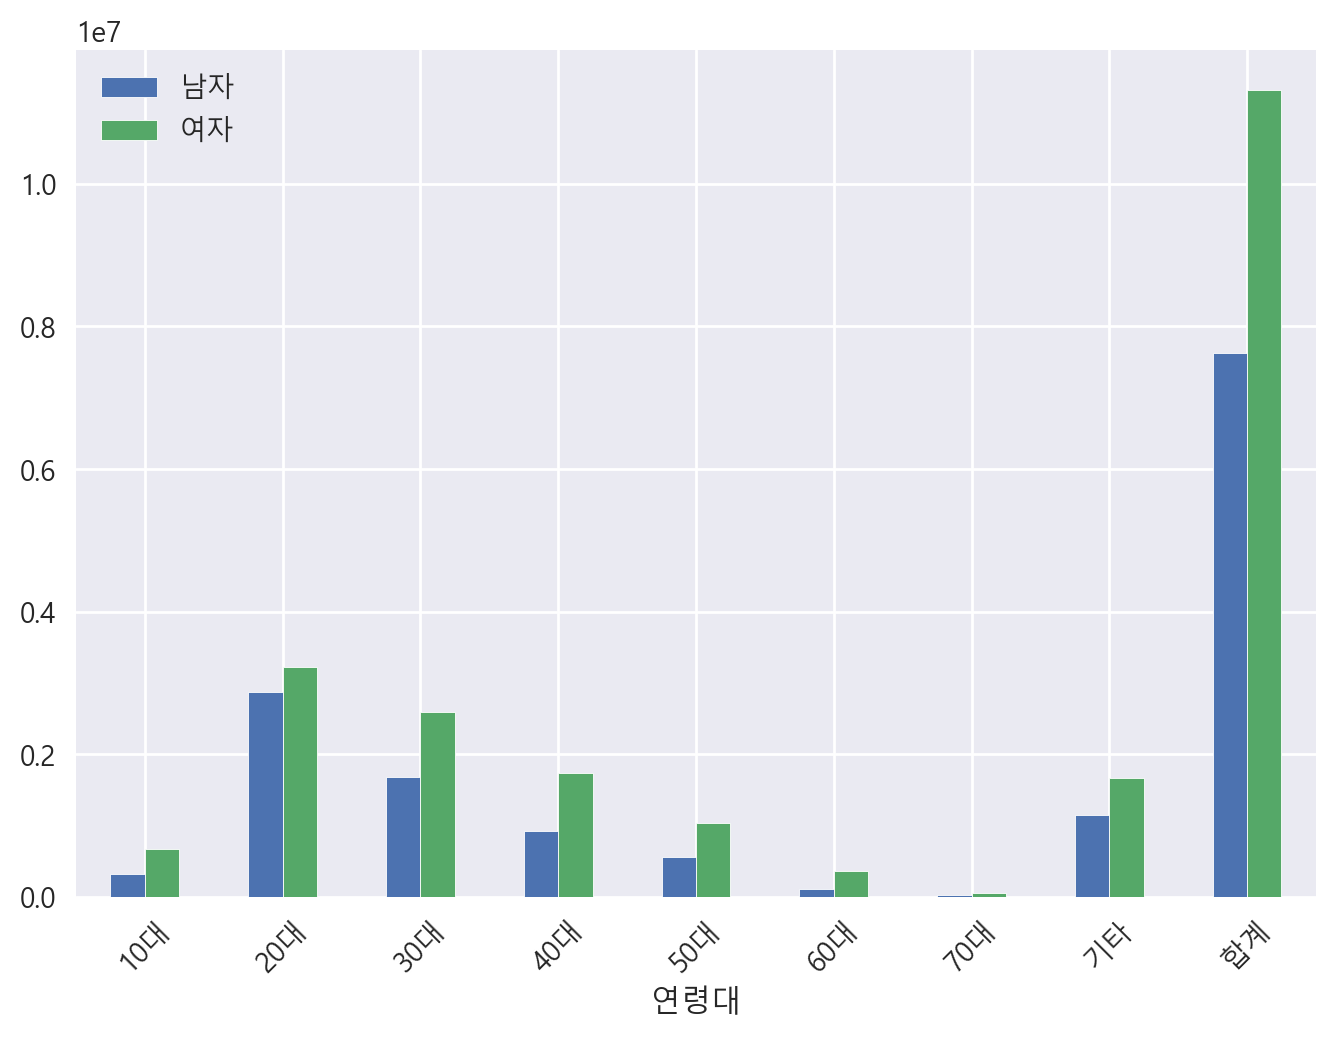

In [454]:
# 연령대, 성별, 이용건수 시각화
age_gender[['남자','여자']].plot.bar(rot=45)

***

**비율 구하기** (이거 다시해야함)

In [500]:
# index="연령대", columns="성별", values="이용건수" 평균
# age_gender
age_gender_rate = pd.pivot_table(data=df, index="연령대",
                            columns="성별", values="이용건수", aggfunc=np.mean)
age_gender_rate = age_gender_rate[['F', 'M']] # 필요한 컬럼만
age_gender_rate

성별,F,M
연령대,,
10대,7.115749,12.312335
20대,45.750773,51.260836
30대,28.312521,43.106148
40대,15.914840,28.298354
50대,12.827867,20.942343
60대,5.076902,10.247485
70대,2.728901,4.020390
기타,21.469167,30.209042


In [501]:
total = age_gender_rate.sum().sum()
# age_gender_rate['F_R'] = age_gender_rate['F']/age_gender_rate['F'].sum()*100
# age_gender_rate['M_R'] = age_gender_rate['M']/age_gender_rate['M'].sum()*100

age_gender_rate['F_R'] = age_gender_rate['F']/total*100
age_gender_rate['M_R'] = age_gender_rate['M']/total*100
age_gender_rate.loc['비율'] = age_gender_rate.sum(axis=0)/total*100
age_gender_rate

성별,F,M,F_R,M_R
연령대,,,,
10대,7.115749,12.312335,2.095372,3.625608
20대,45.750773,51.260836,13.472211,15.094757
30대,28.312521,43.106148,8.337176,12.693449
40대,15.914840,28.298354,4.686436,8.333004
50대,12.827867,20.942343,3.777417,6.166883
60대,5.076902,10.247485,1.494993,3.017573
70대,2.728901,4.020390,0.803578,1.183882
기타,21.469167,30.209042,6.322016,8.895644
비율,40.989200,59.010800,12.070072,17.376886


In [499]:
age_gender_rate['M'].sum()

259.4077327823181

In [481]:
age_gender_rate.sum().sum()

1008.6342625677731

In [480]:
age_gender_rate.sum(axis=1).sum()

1008.6342625677732

## 자치구 vs 연령대

In [510]:
# index="자치구", columns="연령대", values="이용건수" 합계
# gu_age
gu_age = pd.pivot_table(data=df, index="자치구", columns="연령대", values="이용건수", aggfunc=np.sum)

<Axes: xlabel='연령대', ylabel='자치구'>

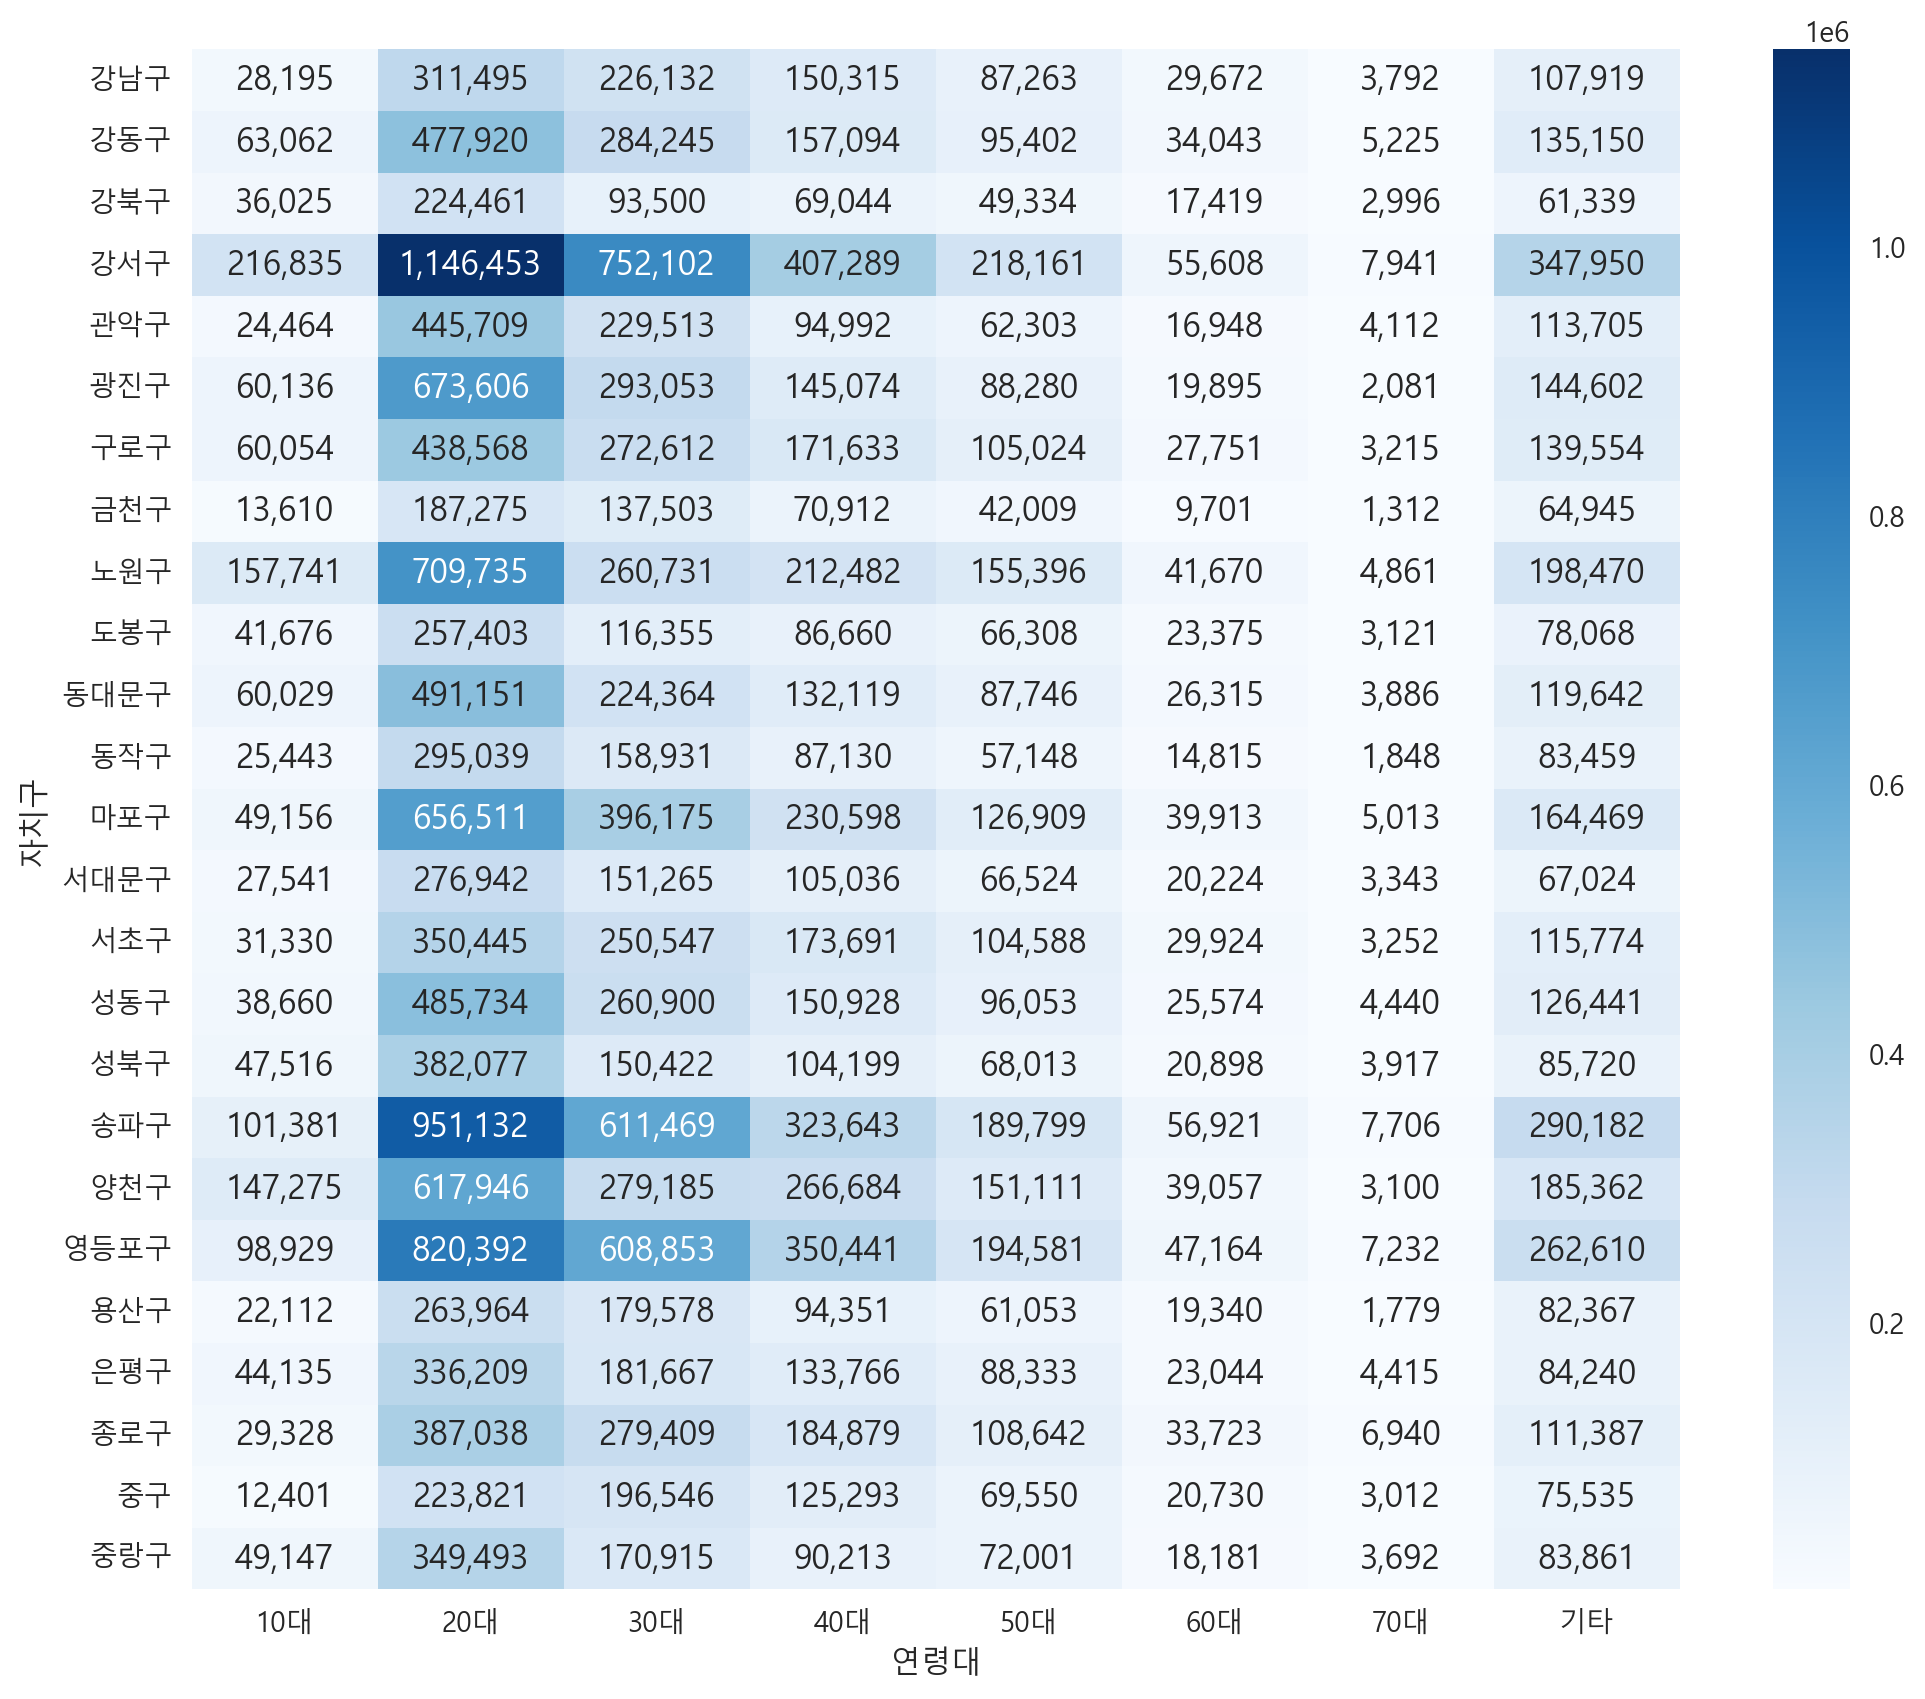

In [517]:
# heatmap 으로 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(gu_age, cmap='Blues', annot=True, fmt=',')

## 수치형 변수 상관관계

In [520]:
# 컬럼 타입으로 열 선택하기
df.select_dtypes(np.number)

,대여소번호,이용건수,운동량,탄소량,이용거리(M),이용시간(분),위도,경도
0,3,2,47.68,0.40,1720.00,25,NaN,NaN
1,3,11,578.98,2.87,12390.48,166,NaN,NaN
2,3,1,81.65,0.53,2291.05,13,NaN,NaN
3,5,1,511.95,3.53,15209.58,47,NaN,NaN
4,5,6,371.10,3.39,14642.60,134,NaN,NaN
...,...,...,...,...,...,...,...,...
1323510,9999,2,77.06,0.64,2780.00,31,NaN,NaN
1323511,9999,1,6.38,0.05,230.10,2,NaN,NaN
1323512,9999,2,82.11,0.74,3190.00,28,NaN,NaN
1323513,88888,1,0.00,0.00,0.00,17,NaN,NaN


In [536]:
# 수치형 변수 상관관계 파악하기
# -1 < x < 1 범위 값을 가지며 1에 가까우면 야의 상관관계,
# -1에 가까우면 음의 상관관계, 0에 가까우면 상관관계가 없다
corr = df.select_dtypes(np.number).corr()
corr

,대여소번호,이용건수,운동량,탄소량,이용거리(M),이용시간(분),위도,경도
대여소번호,1.000000,-0.058496,-0.001739,-0.062423,-0.062165,-0.065537,-0.124292,0.110398
이용건수,-0.058496,1.000000,0.010485,0.855014,0.855063,0.881855,0.006770,-0.044750
운동량,-0.001739,0.010485,1.000000,0.011812,0.011812,0.011448,0.000710,0.001114
탄소량,-0.062423,0.855014,0.011812,1.000000,1.000000,0.970535,-0.014269,-0.027295
이용거리(M),-0.062165,0.855063,0.011812,1.000000,1.000000,0.970542,-0.014151,-0.027264
이용시간(분),-0.065537,0.881855,0.011448,0.970535,0.970542,1.000000,-0.012356,-0.025243
위도,-0.124292,0.006770,0.000710,-0.014269,-0.014151,-0.012356,1.000000,0.130522
경도,0.110398,-0.044750,0.001114,-0.027295,-0.027264,-0.025243,0.130522,1.000000


<Axes: >

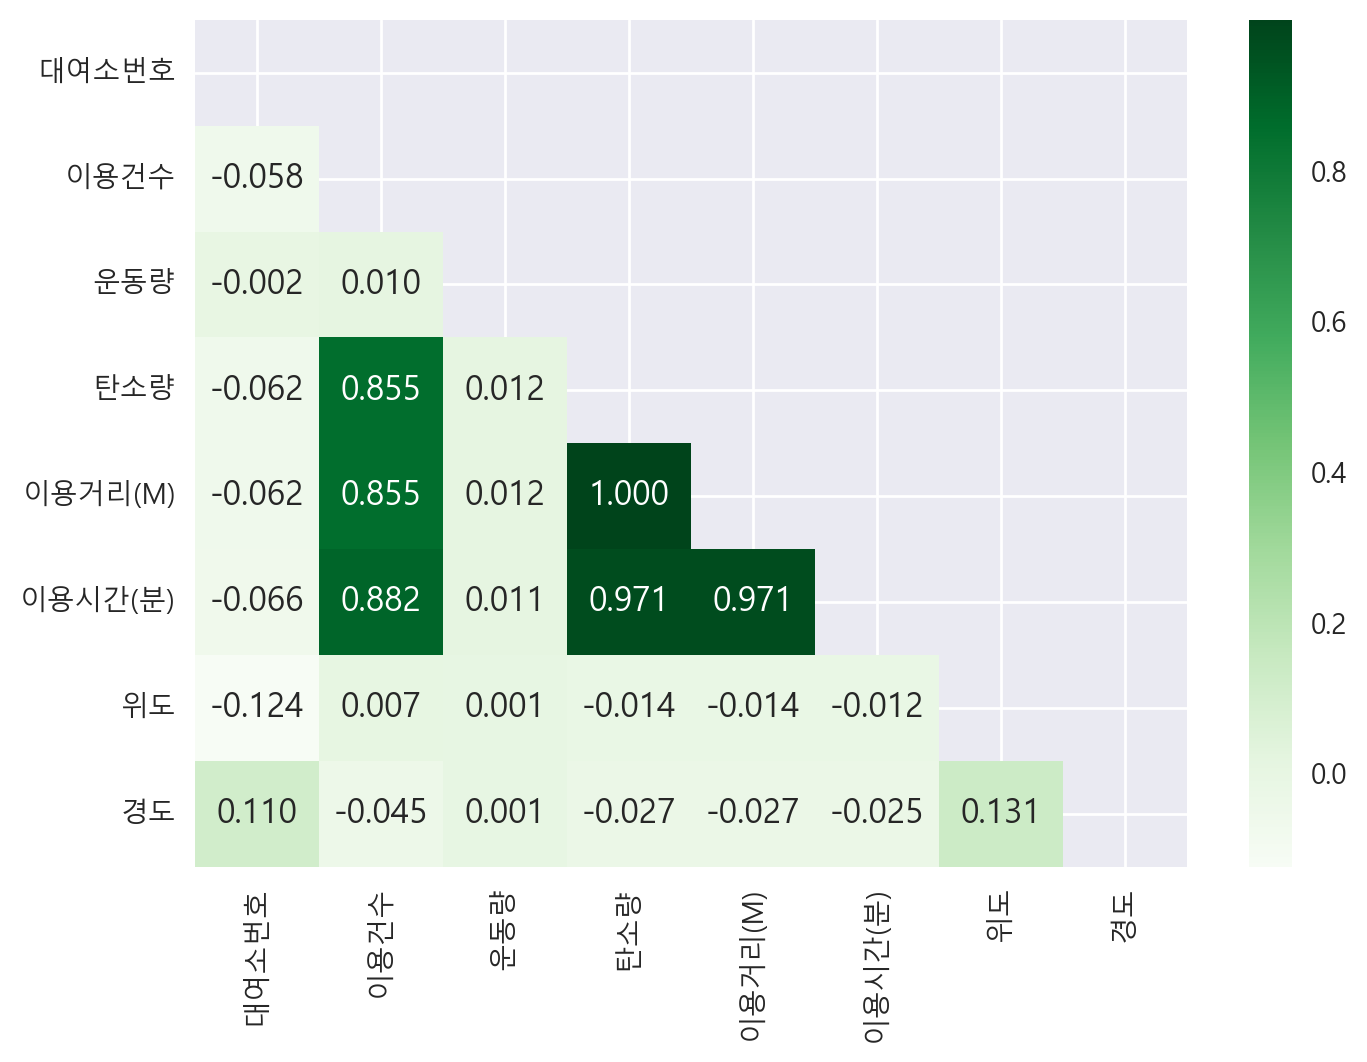

In [541]:
sns.heatmap(corr, cmap='Greens', annot=True, fmt='1.3f', mask = np.triu(np.ones_like(corr)))

## 정렬하기

In [547]:
#"대여일자", "대여소번호", "성별", "연령대코드" 로 정렬하기
df.sort_values(by=['대여일자', '대여소번호', '성별', '연령대코드'], ascending=[False, True, True, True])

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분),자치구,위도,경도,운영방식,연령대
1220590,2021-12,3,중랑센터,정기,M,AGE_004,3,66.29,0.49,2130.00,22,NaN,NaN,NaN,NaN,40대
1220591,2021-12,3,중랑센터,정기,M,AGE_005,3,57.35,0.50,2161.63,31,NaN,NaN,NaN,NaN,50대
1220589,2021-12,3,중랑센터,일일(회원),M,AGE_008,2,31.94,0.25,1090.00,23,NaN,NaN,NaN,NaN,기타
1220592,2021-12,3,중랑센터,정기,M,AGE_008,1,237.99,2.02,8710.00,38,NaN,NaN,NaN,NaN,기타
1220593,2021-12,5,상암센터 정비실,일일(회원),M,AGE_004,13,1214.72,10.45,45109.52,356,NaN,NaN,NaN,NaN,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68730,2021-01,9999,시스템관리팀,정기,M,AGE_004,3,79.00,0.60,2606.34,93,NaN,NaN,NaN,NaN,40대
68726,2021-01,9999,시스템관리팀,정기,\N,AGE_002,1,NaN,NaN,0.00,4,NaN,NaN,NaN,NaN,20대
68722,2021-01,9999,시스템관리팀,단체,\N,AGE_004,2,201.48,1.48,6360.00,83,NaN,NaN,NaN,NaN,40대
68727,2021-01,9999,시스템관리팀,정기,\N,AGE_004,1,35.86,0.32,1392.98,8,NaN,NaN,NaN,NaN,40대


## 전처리 내용 저장하기

In [550]:
# to_csv 로 저장하기
df.to_csv('data06/monthly-bike.csv', index=False)

In [551]:
# 저장한 내용 확인하기
df = pd.read_csv('data06/monthly-bike.csv')

In [552]:
df

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분),자치구,위도,경도,운영방식,연령대
0,2021-01,3,중랑센터,일일(회원),M,AGE_003,2,47.68,0.40,1720.00,25,NaN,NaN,NaN,NaN,30대
1,2021-01,3,중랑센터,정기,M,AGE_003,11,578.98,2.87,12390.48,166,NaN,NaN,NaN,NaN,30대
2,2021-01,3,중랑센터,정기,M,AGE_004,1,81.65,0.53,2291.05,13,NaN,NaN,NaN,NaN,40대
3,2021-01,5,상암센터 정비실,일일(회원),\N,AGE_004,1,511.95,3.53,15209.58,47,NaN,NaN,NaN,NaN,40대
4,2021-01,5,상암센터 정비실,일일(회원),M,AGE_004,6,371.10,3.39,14642.60,134,NaN,NaN,NaN,NaN,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323510,2021-12,9999,상담센터,정기,M,AGE_005,2,77.06,0.64,2780.00,31,NaN,NaN,NaN,NaN,50대
1323511,2021-12,9999,상담센터,정기,M,AGE_006,1,6.38,0.05,230.10,2,NaN,NaN,NaN,NaN,60대
1323512,2021-12,9999,상담센터,정기,M,AGE_008,2,82.11,0.74,3190.00,28,NaN,NaN,NaN,NaN,기타
1323513,2021-12,88888,88888.영남배송,정기,M,AGE_006,1,0.00,0.00,0.00,17,NaN,NaN,NaN,NaN,60대
